In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("bank_marketing_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
#Checking Top 5 Rows

df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
# Checking Last 5 Rows
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [7]:
#Gather all columns

df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [8]:
# all information about data

df.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [9]:
#checking data types

df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

* We can see our target variable 'Subscribed' is object type so it is classfication problem.

In [10]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

Since it contains only 2 values yes or no means it is binary classification problem and needs to be encoded

In [11]:
df['subscribed'].nunique()

2

In [12]:
# Checking Null Values

df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Observation : As no null value present so need of Nan Value treatment .

<Axes: >

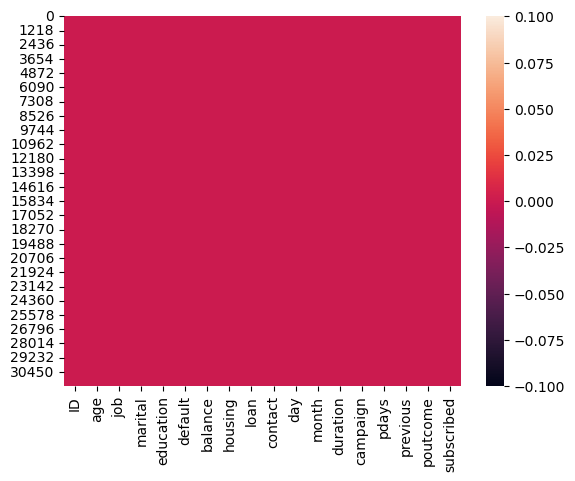

In [13]:
#Heatmap of null values

sns.heatmap(df.isnull())

As we know

ID is Ordinal Data (have some relation/sequence) -> Categorical Data

Variables Job, Marital, Education, Default,housing,loan,contact,month,poutcome are Nominal Data(No Relation between Data) -> Categorical Data

Variables Age,Balance,day,duration,campaign,pdays,previous are numerical datatype

Subsribed is Target Variable which is Nominal data.

# Data Visualization

In [14]:
# Checking Statistical Summary :

df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


All statistical data of all rows shown for each parameters like mean, minimum, maximum , 25th percentile means how much value for each column are below 25th percentile ,similarly for 50th perecntile and 75th perecntile.

In [15]:
# Defining Columns as nominal data and ordinal data

In [16]:
df_visualization_nominal=df[['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']].copy()
df_visualization_nominal.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

Visualization of Nominal Data

For Nominal categorical Data we will use countplot as it will give the frequency of the classes of the columns

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


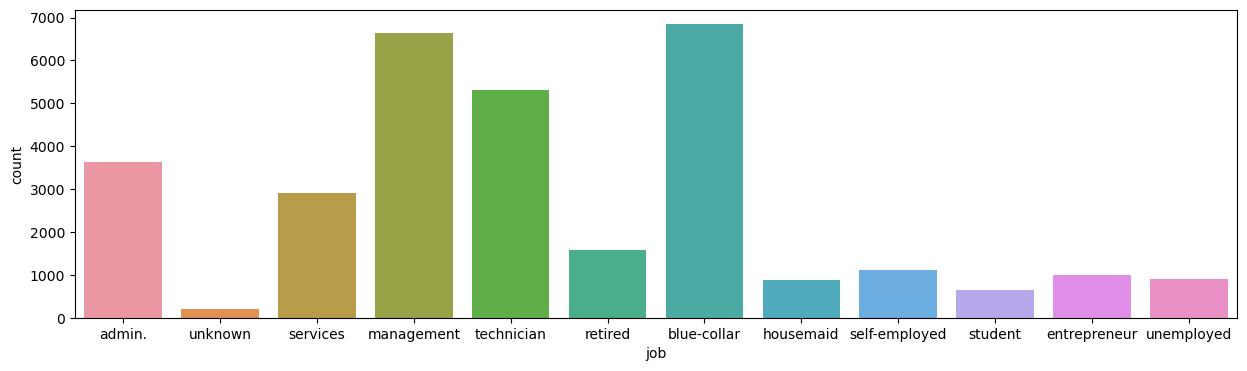

In [17]:
# Job Countplot :

plt.figure(figsize=(15,4))
ax=sns.countplot(x='job',data=df_visualization_nominal)
print(df_visualization_nominal['job'].value_counts())

* Observation : Data shown with no of emloyees working in respective departments

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


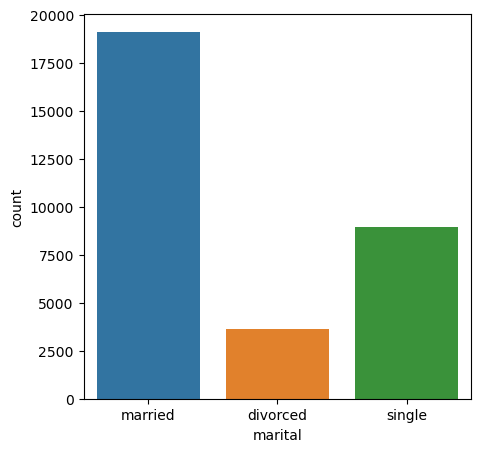

In [18]:
# Marital status Countplot 

plt.figure(figsize=(5,5))
ax=sns.countplot(x='marital',data=df_visualization_nominal)
print(df_visualization_nominal['marital'].value_counts())

* Observation : Total No of married are 19095, Total Single are 8922 and Total divorced are 3630 people

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


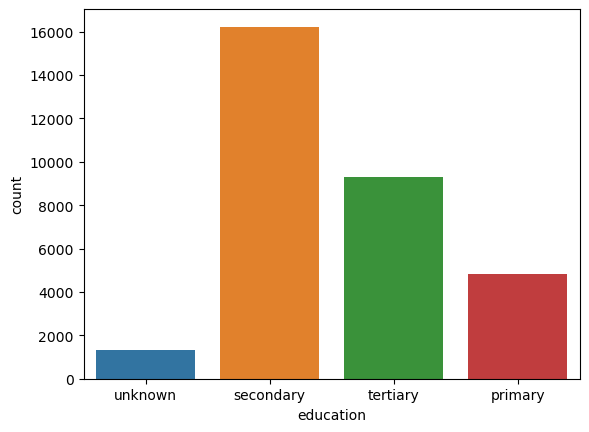

In [19]:
# Education Countplot :

ax=sns.countplot(x='education',data=df_visualization_nominal)
print(df_visualization_nominal['education'].value_counts())

*Observation : Total No of secondary education are 16224, Total No of tertiary education 9301, Total No of primary education are 4808 and Total No of unknown are 1314

no     31062
yes      585
Name: default, dtype: int64


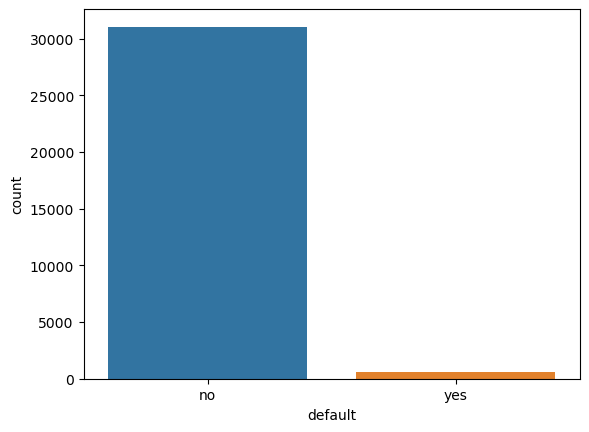

In [20]:
# Default Countplot :

ax=sns.countplot(x='default',data=df_visualization_nominal)
print(df_visualization_nominal['default'].value_counts())

Total deafulters are 31062 and non-defaulters are 585

no     26516
yes     5131
Name: loan, dtype: int64


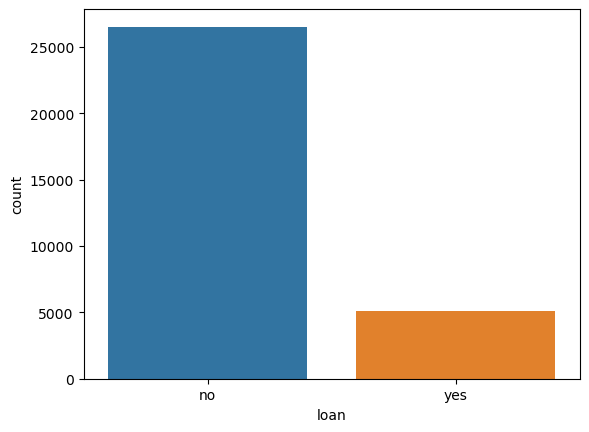

In [21]:
# Loan Countplot :

ax=sns.countplot(x='loan',data=df_visualization_nominal)
print(df_visualization_nominal['loan'].value_counts())

*Observation: Loan taken by 5131 people and not taken by 26516

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64


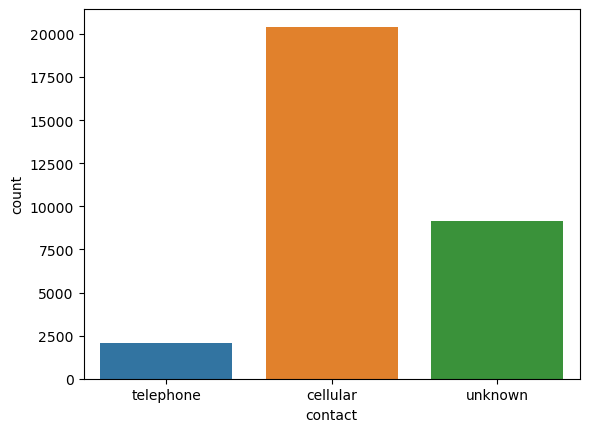

In [22]:
# Contact Countplot :

ax=sns.countplot(x='contact',data=df_visualization_nominal)
print(df_visualization_nominal['contact'].value_counts())

*Observation : 20423 were contacted by cellular , 2047 were contacted by telephone and 9177 contacted by unknown source

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64


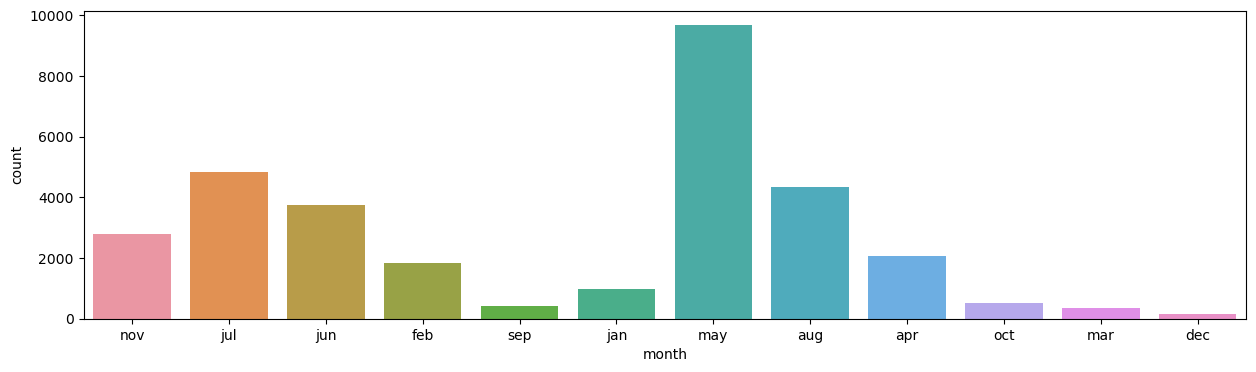

In [23]:
# Month Countplot :

plt.figure(figsize=(15,4))
ax=sns.countplot(x='month',data=df_visualization_nominal)
print(df_visualization_nominal['month'].value_counts())

*Observation : Respected months are shown with no of people

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


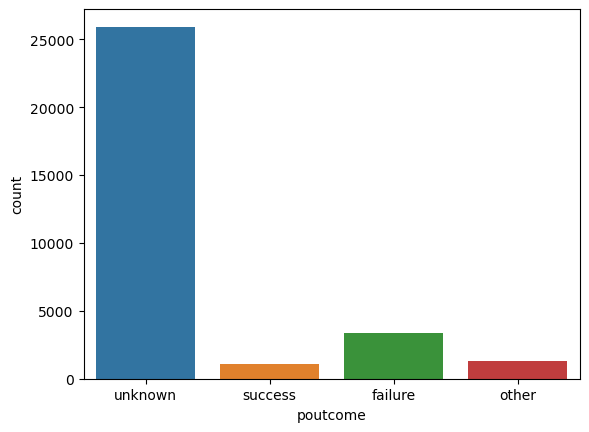

In [24]:
# poutcome countplot :

ax=sns.countplot(x='poutcome',data=df_visualization_nominal)
print(df_visualization_nominal['poutcome'].value_counts())

From previous campaign success is 1068, failure is 3362, 25929 are not clear and 1288 are others

no     27932
yes     3715
Name: subscribed, dtype: int64


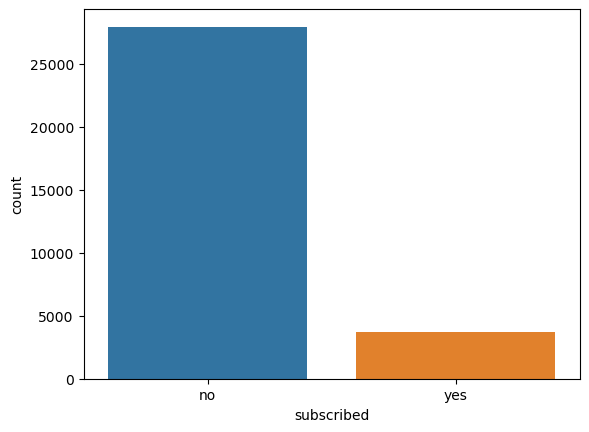

In [25]:
# Target Variable Countplot :

ax=sns.countplot(x='subscribed',data=df_visualization_nominal)
print(df_visualization_nominal['subscribed'].value_counts())

27932 People not subscribed for term deposit and 3715 people subscribed for term deposit

DISTRIBUTION / DENSITY Plot for Numerical Data :

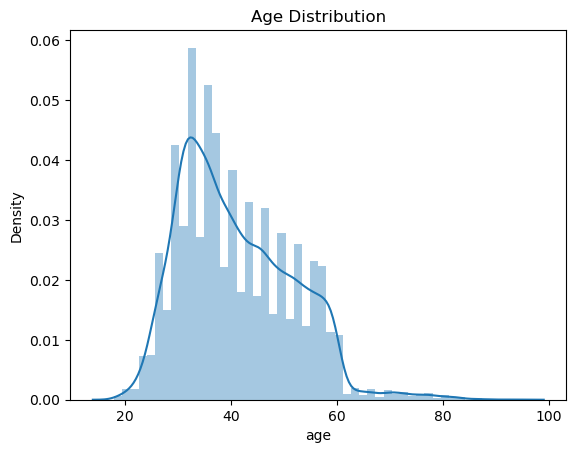

In [26]:
# Age Column

sns.distplot(df['age'])
plt.title("Age Distribution")
plt.show()

* Observation : Max. age lies between 20-40 . Right Skewness present .

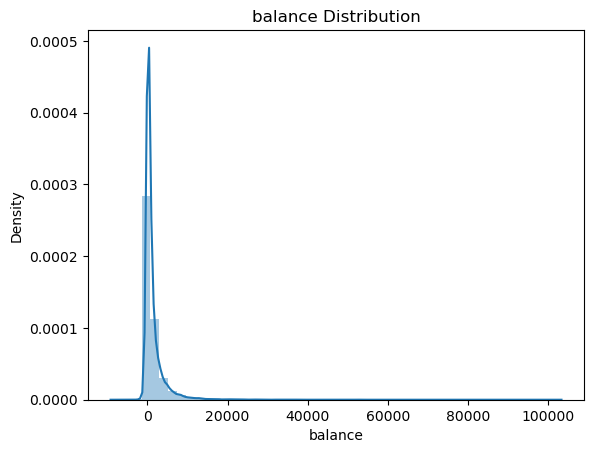

In [27]:
# balance Column

sns.distplot(df['balance'])
plt.title("balance Distribution")
plt.show()

* Observation : No Skewness present .

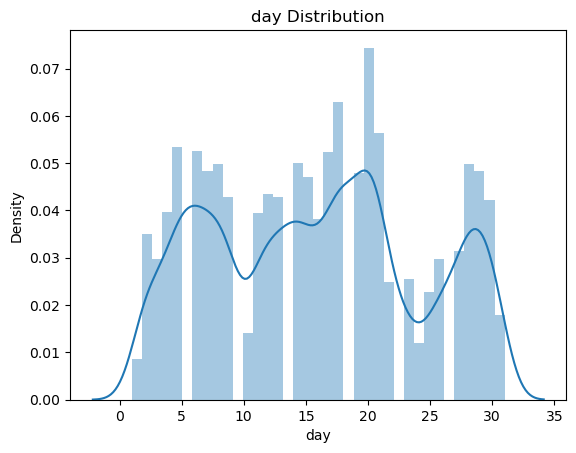

In [28]:
# Day Column

sns.distplot(df['day'])
plt.title("day Distribution")
plt.show()

* Observation : Max. age lies between 1-30 . High Skewness present .

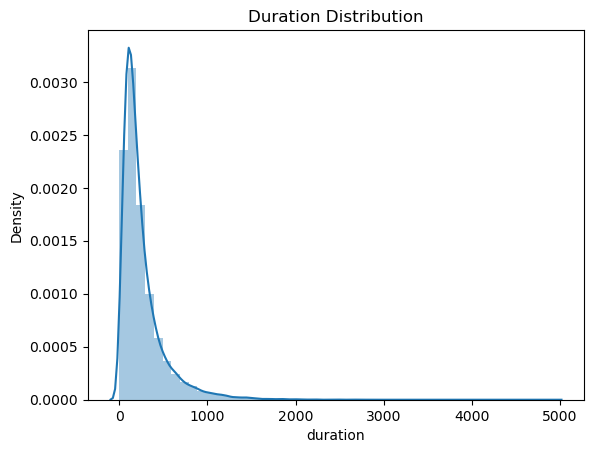

In [29]:
# Duration Column

sns.distplot(df['duration'])
plt.title("Duration Distribution")
plt.show()

* Observation : Right Skewness present .

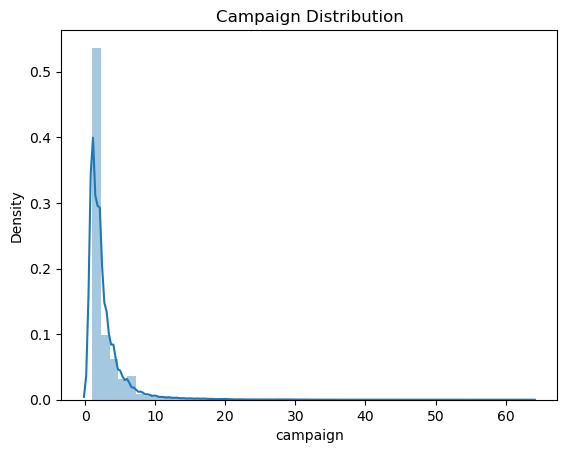

In [30]:
# Campaign Column

sns.distplot(df['campaign'])
plt.title("Campaign Distribution")
plt.show()

* Observation : Right Skewness present .

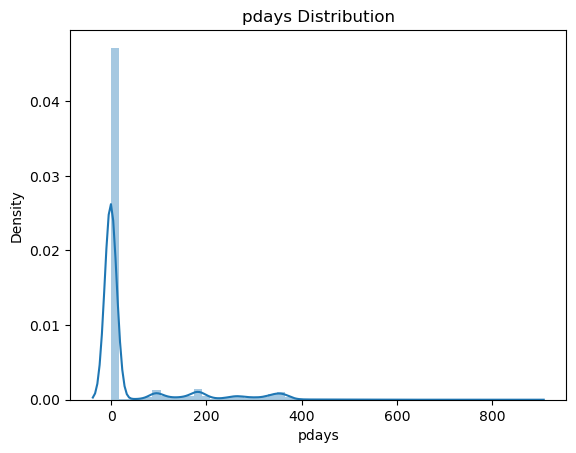

In [31]:
# pdays Column

sns.distplot(df['pdays'])
plt.title("pdays Distribution")
plt.show()

* Observation : No Skewness present .

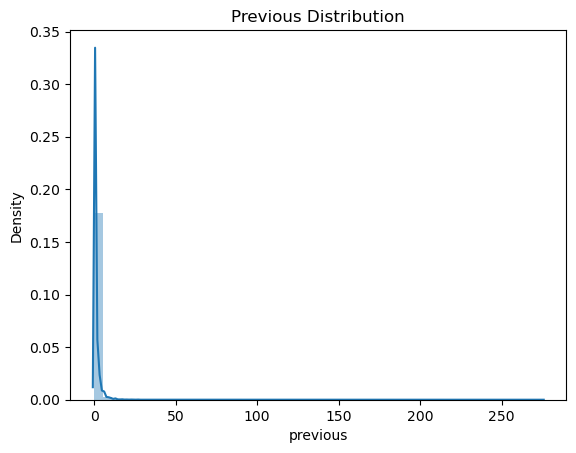

In [32]:
# Previous Column

sns.distplot(df['previous'])
plt.title("Previous Distribution")
plt.show()

* Observation : No Skewness present .

# Encoding of Target Variable :

In [33]:
# Encoding Subscribed column
df.replace({'subscribed':{'no':0,'yes':1}},inplace=True)
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,0


BIVARIATE ANALYSIS with Target Variable :

In [34]:
## Nominal Data :

<Axes: xlabel='subscribed', ylabel='job'>

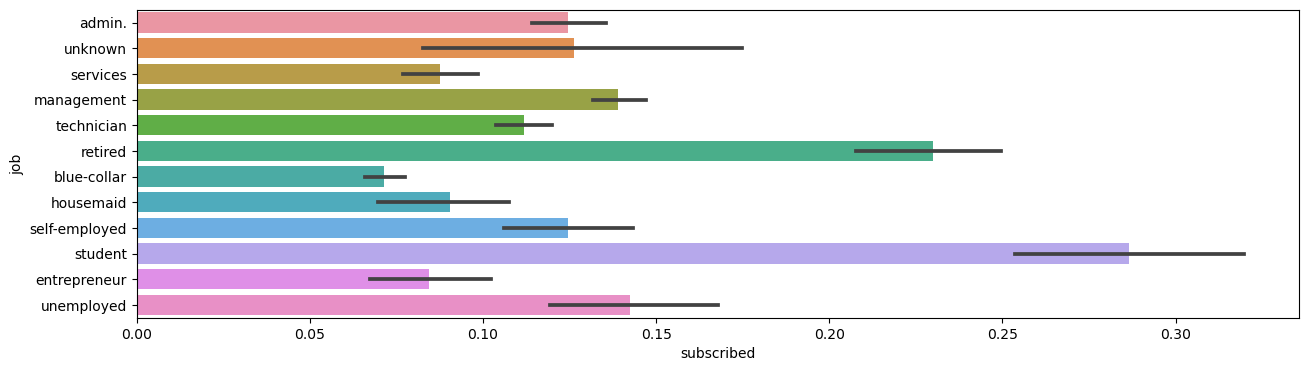

In [35]:
# Checking for Job vs Subscribed 
plt.figure(figsize=(15,4))
sns.barplot(x='subscribed',y='job',data=df)

* Observation : Student segment more likely to subscribe

<Axes: xlabel='subscribed', ylabel='marital'>

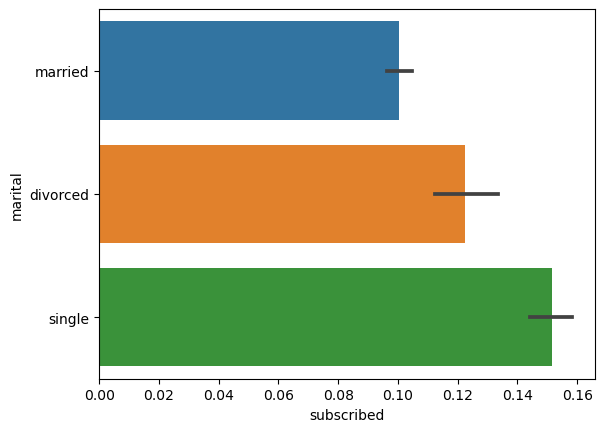

In [36]:
# Checking for Marital vs Subscribed

sns.barplot(x='subscribed',y='marital',data=df)

* Observation : Single segment more likely to subscribe

<Axes: xlabel='subscribed', ylabel='education'>

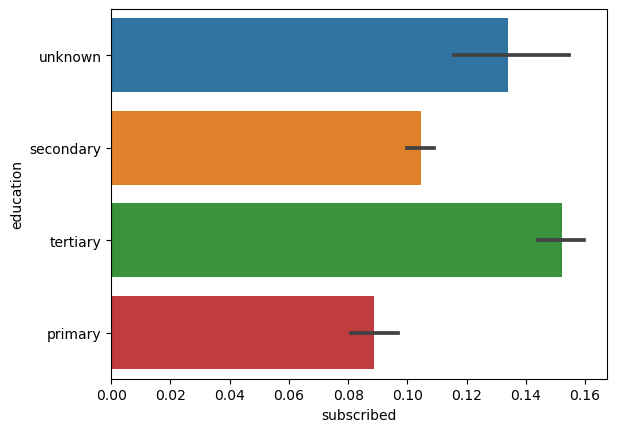

In [37]:
# Checking for Education vs Subscribed

sns.barplot(x='subscribed',y='education',data=df)

* Observation : tertiary segment more likely to subscribe

<Axes: xlabel='subscribed', ylabel='housing'>

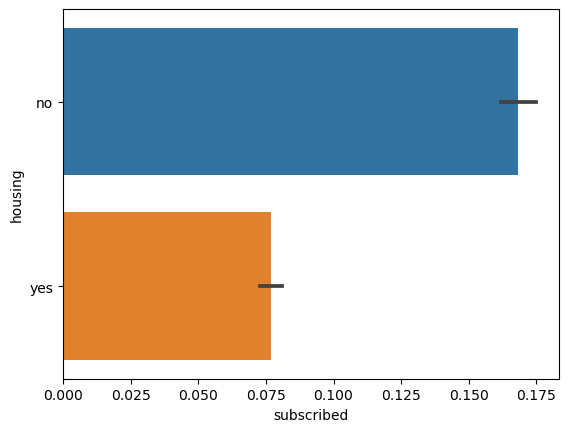

In [38]:
# Checking for housing vs Subscribed

sns.barplot(x='subscribed',y='housing',data=df)

* Observation : housing with no values segment more likely to subscribe

<Axes: xlabel='subscribed', ylabel='loan'>

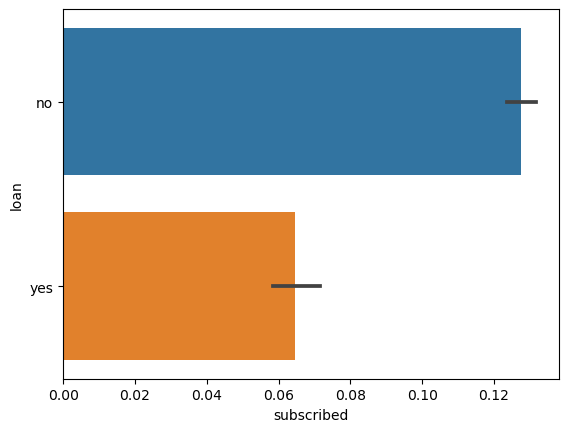

In [39]:
# Checking for loan vs Subscribed

sns.barplot(x='subscribed',y='loan',data=df)

* Observation : Loan with no values segment more likely to subscribe

<Axes: xlabel='subscribed', ylabel='month'>

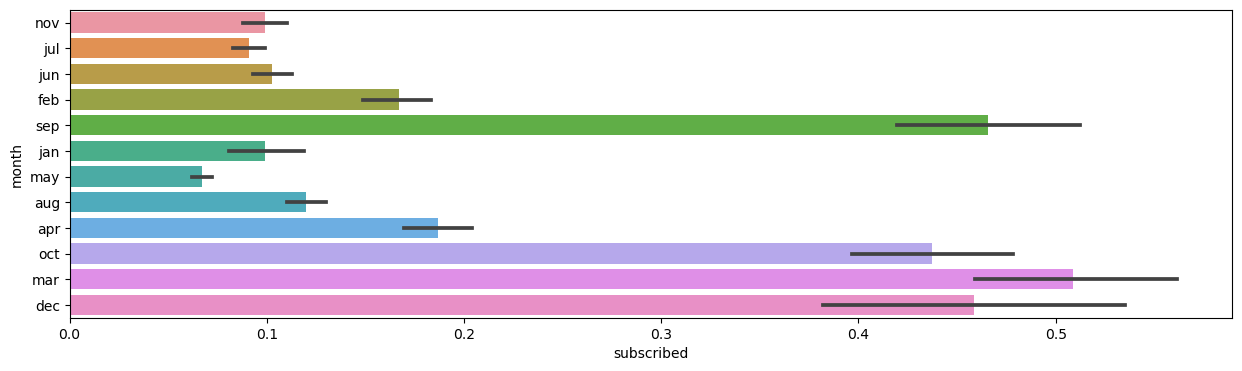

In [40]:
# Checking for month vs Subscribed

plt.figure(figsize=(15,4))
sns.barplot(x='subscribed',y='month',data=df)

* Observation : March segment more likely to subscribe

<Axes: xlabel='subscribed', ylabel='poutcome'>

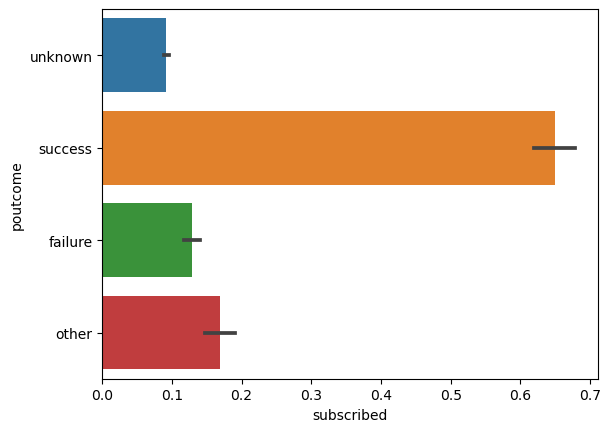

In [41]:
# Checking for poutcome vs Subscribed

sns.barplot(x='subscribed',y='poutcome',data=df)

* Observation : Success segment more likely to subscribe

In [42]:
## Nominal Data -> Scatter plot with Target variable :

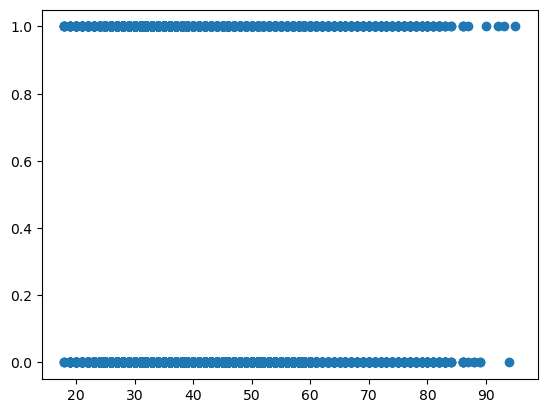

In [43]:
# age Scatter plot
plt.scatter(df['age'],df['subscribed'])

Observation : - Age Vlaues mostly concentrated in range 20-80

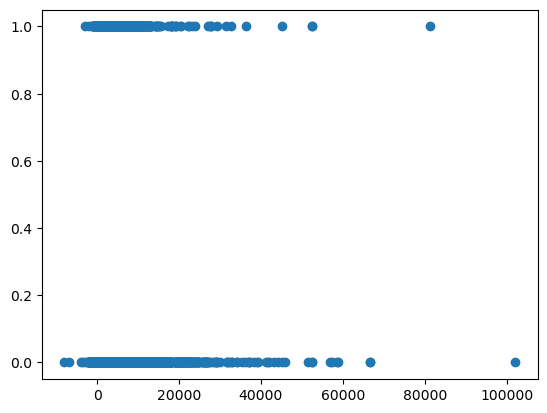

In [44]:
# Balance Scatter plot
plt.scatter(df['balance'],df['subscribed'])

Observation : - Balance Values mostly concentrated in range 0-40000

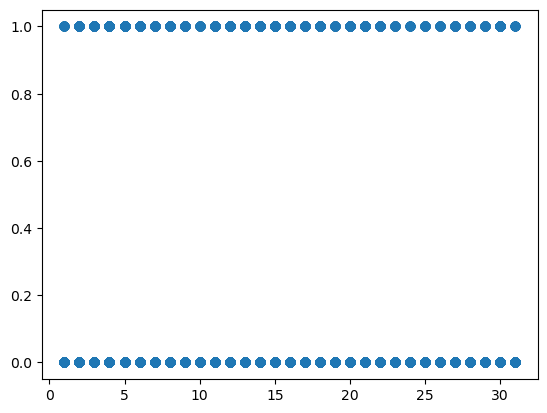

In [45]:
# Day Scatter plot
plt.scatter(df['day'],df['subscribed'])

Observation : - Day Values mostly concentrated in range 1-30

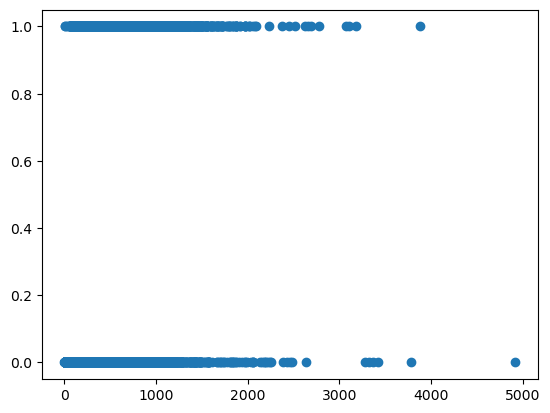

In [46]:
# Duration Scatter plot
plt.scatter(df['duration'],df['subscribed'])

Observation : - Duration Values mostly concentrated in range 0-25k .

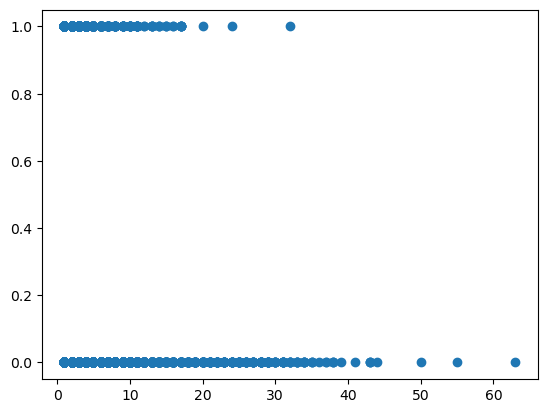

In [47]:
# Campaign Scatter plot
plt.scatter(df['campaign'],df['subscribed'])

*Observation  : Campaign Values mostly concentrated in range 0-40

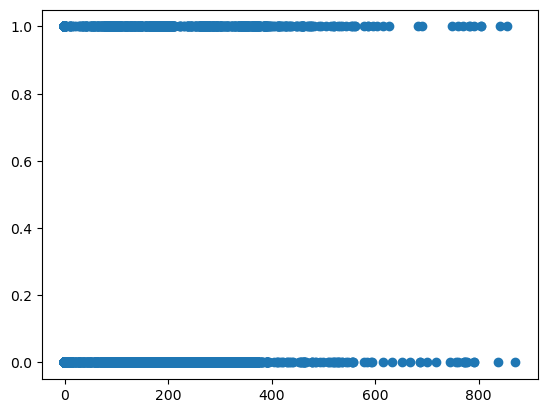

In [48]:
# pDay Scatter plot
plt.scatter(df['pdays'],df['subscribed'])

pdays Values mostly concentrated in range 0-600

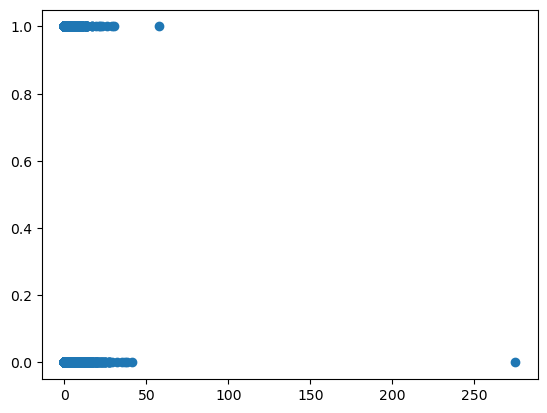

In [49]:
# Previous Scatter plot
plt.scatter(df['previous'],df['subscribed'])

Observation : - Previous Values mostly concentrated in range 0-40

In [50]:
## MULTIVARIATE ANALYSIS

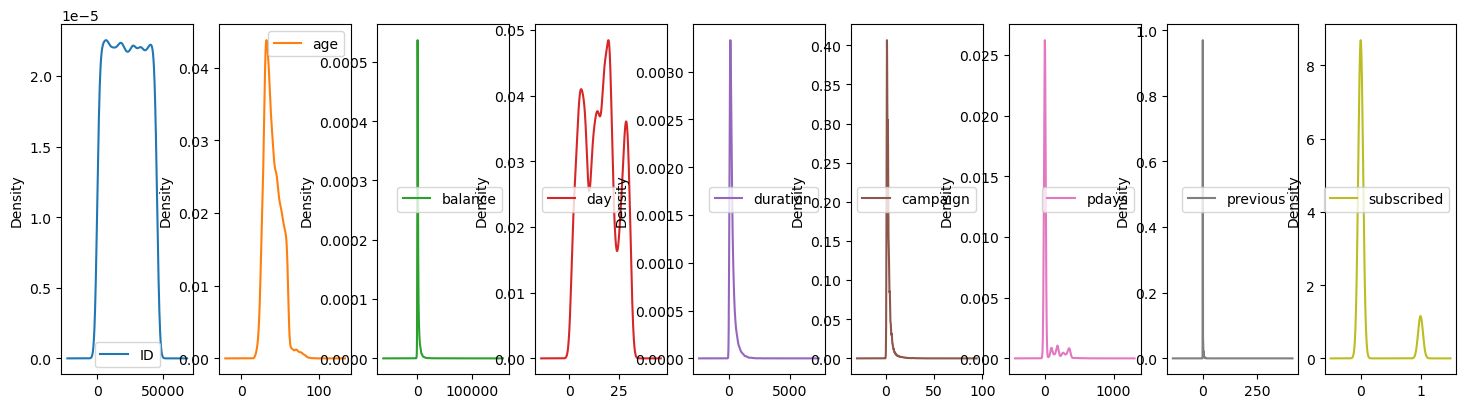

In [51]:
#check data distribution among all coulmns

df.plot(kind='density',subplots=True,layout=(2,9),sharex=False,legend=True,figsize=(18,10))
plt.show()

Encoding Categorical columns

In [52]:
# As our data has lot of string/object values so convert in numerical data

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0
31645,38556,57,9,1,1,0,225,1,0,1,15,8,22,7,337,12,0,0


# Correlation :

In [54]:
#Now we check correlation of input parameters with output "quality" :
#positively correlated : direct correlation
#negatively correlated : negative correlation

In [55]:
dfcor=df.corr()
dfcor

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
ID,1.000000,0.013337,0.061805,0.086454,0.096480,-0.051521,0.067897,-0.180047,-0.086140,-0.723830,-0.063399,-0.165274,0.007183,-0.103508,0.436148,0.254476,-0.443429,0.296663
age,0.013337,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,0.061805,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,0.086454,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,0.096480,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.051521,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.067897,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.180047,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.086140,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,-0.723830,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051


<Axes: >

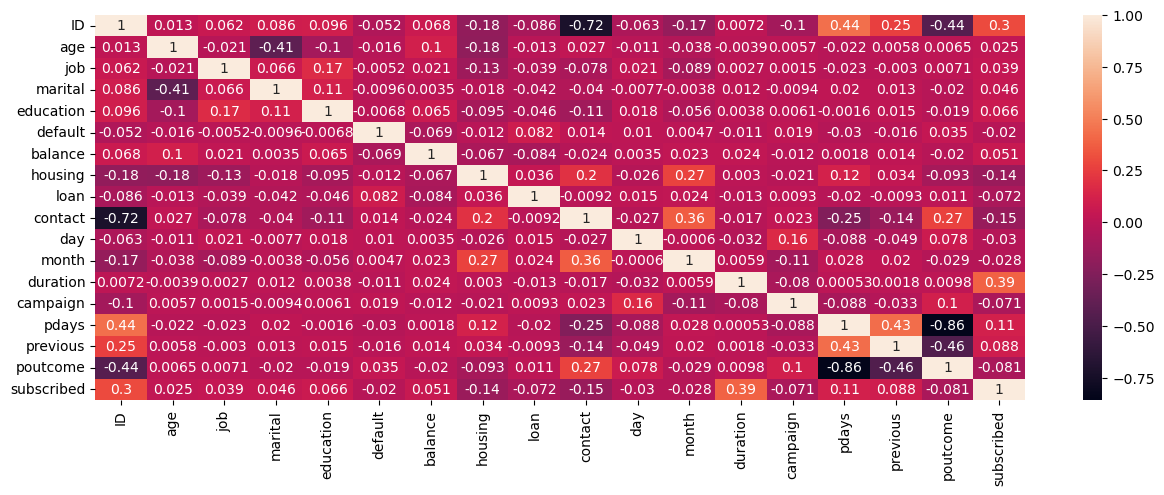

In [56]:
# For better understanding of correlation matrix between columns we draw heatmap :

plt.figure(figsize=(15,5))
sns.heatmap(dfcor,annot=True)

<Axes: >

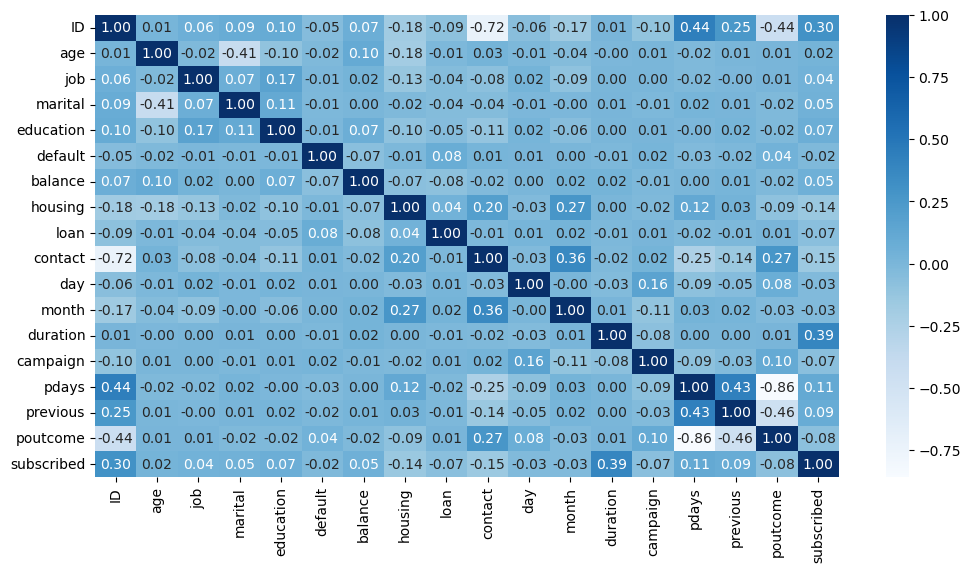

In [57]:
# We can change color also and decimal values place :

plt.figure(figsize=(12,6))
sns.heatmap(dfcor,annot=True,cmap='Blues',fmt='0.2f',cbar=True,square=False)

In [58]:
#Correlation of all columns with the target column 'subscribed':

In [59]:
df.corr()["subscribed"].sort_values()

contact      -0.150051
housing      -0.141092
poutcome     -0.080895
loan         -0.072266
campaign     -0.070607
day          -0.029600
month        -0.028088
default      -0.020168
age           0.024538
job           0.038921
marital       0.046043
balance       0.050807
education     0.066051
previous      0.088081
pdays         0.108290
ID            0.296663
duration      0.389838
subscribed    1.000000
Name: subscribed, dtype: float64

We can see with target variable all columns are very less correlated as value <0.3.

pdays and poutcome has high correlation wit each other so we will remove poutcome because it is very less correlated to target variable

contact and ID has high correlation wit each other so we will remove contact because it is very less correlated to target variable

In [60]:
df1=df.drop(['poutcome','contact'],axis=1)
df1

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed
0,26110,56,0,1,3,0,1933,0,0,19,9,44,2,-1,0,0
1,40576,31,11,1,1,0,3,0,0,20,5,91,2,-1,0,0
2,15320,27,7,1,1,0,891,1,0,18,5,240,1,-1,0,0
3,43962,57,4,0,2,0,3287,0,0,22,6,867,1,84,3,1
4,29842,31,9,1,1,0,119,1,0,4,3,380,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,12,8,116,2,-1,0,0
31643,40178,53,4,0,2,0,380,0,1,5,6,438,2,-1,0,1
31644,19710,32,4,2,2,0,312,0,0,7,1,37,3,-1,0,0
31645,38556,57,9,1,1,0,225,1,0,15,8,22,7,337,12,0


# Skewness :

Preprocessing

Split data into x and y as we don't treat target variable

In [61]:
x=df1.iloc[:,:-1]
y=df1.iloc[:,-1]

In [62]:
x

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,26110,56,0,1,3,0,1933,0,0,19,9,44,2,-1,0
1,40576,31,11,1,1,0,3,0,0,20,5,91,2,-1,0
2,15320,27,7,1,1,0,891,1,0,18,5,240,1,-1,0
3,43962,57,4,0,2,0,3287,0,0,22,6,867,1,84,3
4,29842,31,9,1,1,0,119,1,0,4,3,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,12,8,116,2,-1,0
31643,40178,53,4,0,2,0,380,0,1,5,6,438,2,-1,0
31644,19710,32,4,2,2,0,312,0,0,7,1,37,3,-1,0
31645,38556,57,9,1,1,0,225,1,0,15,8,22,7,337,12


In [63]:
x.skew().sort_values(ascending=False)

previous     49.302348
balance       7.995696
default       7.149903
campaign      4.873935
duration      3.199766
pdays         2.642374
loan          1.833474
age           0.681607
job           0.264817
education     0.199441
day           0.087185
ID            0.005851
marital      -0.100071
housing      -0.223918
month        -0.486498
dtype: float64

In [64]:
#Remove Skewness - apply power transformation

from sklearn.preprocessing import power_transform
x_new=power_transform(x,method='yeo-johnson')
x_new

array([[ 0.35095073,  1.34138189, -1.61003975, ...,  0.135025  ,
        -0.46969565, -0.46967334],
       [ 1.27658532, -0.9663778 ,  1.6528723 , ...,  0.135025  ,
        -0.46969565, -0.46967334],
       [-0.44573069, -1.53815285,  0.8592082 , ..., -1.1092387 ,
        -0.46969565, -0.46967334],
       ...,
       [-0.10616057, -0.83671116,  0.09593561, ...,  0.73858224,
        -0.46969565, -0.46967334],
       [ 1.15412705,  1.40695494,  1.27892758, ...,  1.60920054,
         2.15084394,  2.18608335],
       [-0.54043023,  1.27441963,  0.09593561, ...,  0.135025  ,
        -0.46969565, -0.46967334]])

In [65]:
x=pd.DataFrame(x_new,columns=x.columns)                                        #convert transformed data into DataFrame

In [66]:
#after transformation check skewness

In [67]:
x.skew().sort_values(ascending=False)

default      7.149903
loan         1.833474
previous     1.661485
pdays        1.660825
balance      0.821075
campaign     0.230683
duration     0.017331
age          0.008940
education   -0.039618
marital     -0.050323
job         -0.145894
day         -0.159858
housing     -0.223918
ID          -0.290929
month       -0.383709
dtype: float64

Observation : Since default and loan are categorical in nature so no mean / median present so no effect of skewness , we not treat it.

In [68]:
from sklearn.preprocessing import PowerTransformer 
trans=PowerTransformer(method='yeo-johnson')

In [69]:
x[['pdays','previous','balance']]=trans.fit_transform(x[['pdays','previous','balance']].values)
x.skew().sort_values(ascending=False)

default      7.149903
loan         1.833474
pdays        1.658561
previous     1.658560
campaign     0.230683
duration     0.017331
age          0.008940
education   -0.039618
marital     -0.050323
job         -0.145894
day         -0.159858
housing     -0.223918
ID          -0.290929
month       -0.383709
balance     -3.868969
dtype: float64

Observation : Since default and loan are categorical in nature so no mean / median present so no effect of skewness , we not treat it.

# Feature Scaling :

In [70]:
# Scaling increases the model performance to much extent, we get best result after scaling data

In [71]:
# Standard Scaling :

from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x1=st.fit_transform(x)
x1

array([[ 0.35095073,  1.34138189, -1.61003975, ...,  0.135025  ,
        -0.46985154, -0.46985164],
       [ 1.27658532, -0.9663778 ,  1.6528723 , ...,  0.135025  ,
        -0.46985154, -0.46985164],
       [-0.44573069, -1.53815285,  0.8592082 , ..., -1.1092387 ,
        -0.46985154, -0.46985164],
       ...,
       [-0.10616057, -0.83671116,  0.09593561, ...,  0.73858224,
        -0.46985154, -0.46985164],
       [ 1.15412705,  1.40695494,  1.27892758, ...,  1.60920054,
         2.12901773,  2.12990688],
       [-0.54043023,  1.27441963,  0.09593561, ...,  0.135025  ,
        -0.46985154, -0.46985164]])

In [72]:
x=pd.DataFrame(x1,columns=x.columns)                                   #convert scaled data into DataFrame

In [73]:
# Multicollinearity Check VIF Technique

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
    
vif_calc()

       VIF Factor   features
0        1.466685         ID
1        1.300444        age
2        1.064985        job
3        1.260471    marital
4        1.075771  education
5        1.037003    default
6        1.069755    balance
7        1.195222    housing
8        1.027222       loan
9        1.029072        day
10       1.152392      month
11       1.017493   duration
12       1.075531   campaign
13  653985.511040      pdays
14  653971.599833   previous


Since pdays and previoua has high high vif value as only accepted vif value=5 so drop column one by one

In [75]:
x=x.drop(['pdays'],axis=1)
x

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous
0,0.350951,1.341382,-1.610040,-0.285588,2.196278,-0.137234,0.371079,-1.118201,-0.439893,0.439464,1.190999,-1.443825,0.135025,-0.469852
1,1.276585,-0.966378,1.652872,-0.285588,-0.253707,-0.137234,-0.419204,-1.118201,-0.439893,0.548516,-0.224756,-0.751296,0.135025,-0.469852
2,-0.445731,-1.538153,0.859208,-0.285588,-0.253707,-0.137234,-0.001079,0.894294,-0.439893,0.328737,-0.224756,0.290005,-1.109239,-0.469852
3,1.477866,1.406955,0.095936,-1.895356,1.027984,-0.137234,0.793482,-1.118201,-0.439893,0.762001,0.118284,1.895948,-1.109239,2.129700
4,0.601861,-0.966378,1.278928,-0.285588,-0.253707,-0.137234,-0.344299,0.894294,-0.439893,-1.515370,-0.882688,0.833299,-1.109239,-0.469852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.026451,-1.240871,0.095936,1.382363,1.027984,-0.137234,-0.422348,0.894294,-0.439893,-0.378514,0.826908,-0.503544,0.135025,-0.469852
31643,1.252604,1.136104,0.095936,-1.895356,1.027984,-0.137234,-0.214988,-1.118201,2.273280,-1.352488,0.118284,1.008101,0.135025,-0.469852
31644,-0.106161,-0.836711,0.095936,1.382363,1.027984,-0.137234,-0.246556,-1.118201,-0.439893,-1.049546,-1.488997,-1.598288,0.738582,-0.469852
31645,1.154127,1.406955,1.278928,-0.285588,-0.253707,-0.137234,-0.288763,0.894294,-0.439893,-0.014725,0.826908,-2.037314,1.609201,2.129907


In [76]:
vif_calc()

    VIF Factor   features
0     1.466569         ID
1     1.300071        age
2     1.064957        job
3     1.260444    marital
4     1.075613  education
5     1.036962    default
6     1.069721    balance
7     1.193275    housing
8     1.027222       loan
9     1.029058        day
10    1.152392      month
11    1.017487   duration
12    1.075266   campaign
13    1.360170   previous


Since all vif values less than 5 so no multicollinerity remains now

# Outliers detection

In [77]:
from scipy.stats import zscore
import numpy as np

In [78]:
z=np.abs(zscore(x))
z

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous
0,0.350951,1.341382,1.610040,0.285588,2.196278,0.137234,0.371079,1.118201,0.439893,0.439464,1.190999,1.443825,0.135025,0.469852
1,1.276585,0.966378,1.652872,0.285588,0.253707,0.137234,0.419204,1.118201,0.439893,0.548516,0.224756,0.751296,0.135025,0.469852
2,0.445731,1.538153,0.859208,0.285588,0.253707,0.137234,0.001079,0.894294,0.439893,0.328737,0.224756,0.290005,1.109239,0.469852
3,1.477866,1.406955,0.095936,1.895356,1.027984,0.137234,0.793482,1.118201,0.439893,0.762001,0.118284,1.895948,1.109239,2.129700
4,0.601861,0.966378,1.278928,0.285588,0.253707,0.137234,0.344299,0.894294,0.439893,1.515370,0.882688,0.833299,1.109239,0.469852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,1.026451,1.240871,0.095936,1.382363,1.027984,0.137234,0.422348,0.894294,0.439893,0.378514,0.826908,0.503544,0.135025,0.469852
31643,1.252604,1.136104,0.095936,1.895356,1.027984,0.137234,0.214988,1.118201,2.273280,1.352488,0.118284,1.008101,0.135025,0.469852
31644,0.106161,0.836711,0.095936,1.382363,1.027984,0.137234,0.246556,1.118201,0.439893,1.049546,1.488997,1.598288,0.738582,0.469852
31645,1.154127,1.406955,1.278928,0.285588,0.253707,0.137234,0.288763,0.894294,0.439893,0.014725,0.826908,2.037314,1.609201,2.129907


In [79]:
threshold=3
print(np.where(z>3))

(array([   10,    26,   109, ..., 31614, 31618, 31646], dtype=int64), array([ 5,  6,  5, ...,  5,  5, 11], dtype=int64))


Removing outliers from x

In [80]:
df2=df[(z<3).all(axis=1)]
df2

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,40576,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,15320,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,43962,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,29842,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,9476,37,9,2,2,0,1309,0,0,2,6,6,442,2,-1,0,3,0
31642,36483,29,4,2,2,0,0,1,0,0,12,8,116,2,-1,0,3,0
31643,40178,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,19710,32,4,2,2,0,312,0,0,0,7,1,37,3,-1,0,3,0


After outliers removal some rows are removed so check data loss :-

In [81]:
# % Data Loss

data_loss=(31647-30417)/31647*100
print(data_loss)

3.886624324580529


Since very much data loss so it is acceptable

# Data Preprocessing

In [82]:
df['subscribed'].unique()

array([0, 1], dtype=int64)

# Handling Imbalance Data :

In [83]:
# Split x and y

x=df1.drop(columns=['subscribed'],axis=1)
x

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous
0,26110,56,0,1,3,0,1933,0,0,19,9,44,2,-1,0
1,40576,31,11,1,1,0,3,0,0,20,5,91,2,-1,0
2,15320,27,7,1,1,0,891,1,0,18,5,240,1,-1,0
3,43962,57,4,0,2,0,3287,0,0,22,6,867,1,84,3
4,29842,31,9,1,1,0,119,1,0,4,3,380,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,4,2,2,0,0,1,0,12,8,116,2,-1,0
31643,40178,53,4,0,2,0,380,0,1,5,6,438,2,-1,0
31644,19710,32,4,2,2,0,312,0,0,7,1,37,3,-1,0
31645,38556,57,9,1,1,0,225,1,0,15,8,22,7,337,12


In [84]:
y=df['subscribed']
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [85]:
# Oversampling

from imblearn.over_sampling import SMOTE
SM=SMOTE()
x,y=SM.fit_resample(x,y)
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

* Observation : Now Data is balanced here

# Train and Test Splitting :

In [86]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [87]:
x.shape,x_train.shape,x_test.shape

((55864, 15), (44691, 15), (11173, 15))

In [88]:
y.shape,y_train.shape,y_test.shape

((55864,), (44691,), (11173,))

# Modelling :

Metrics imported :

In [89]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

1. LOGISTICS REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

LR.fit(x_train,y_train)

LogisticRegression()

Our Model is successfully trained , Lets perform prediction

In [91]:
pred_train_lr=LR.predict(x_train)
predlr=LR.predict(x_test)
print("Training Accuracy",accuracy_score(y_train,pred_train_lr)*100) 
print("Testing Accuracy:-",accuracy_score(y_test,predlr)*100)                               #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predlr))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predlr))                    # Take Classification report as CR

Training Accuracy 79.30455796469089
Testing Accuracy:- 79.02980399176587
CM:- [[4135 1468]
 [ 875 4695]]
CR:-               precision    recall  f1-score   support

           0       0.83      0.74      0.78      5603
           1       0.76      0.84      0.80      5570

    accuracy                           0.79     11173
   macro avg       0.79      0.79      0.79     11173
weighted avg       0.79      0.79      0.79     11173



In [92]:
from sklearn.model_selection import cross_val_score
cr_1=cross_val_score(LR,x,y,cv=7)
print("Cross Validation Score of Logistic Regression model:-",cr_1.mean())
diff_1=accuracy_score(y_test,predlr)-cr_1.mean()
print("diff between accuracy score and cross validation score is -",diff_1)

Cross Validation Score of Logistic Regression model:- 0.7993880224753267
diff between accuracy score and cross validation score is - -0.00908998255766802


* Apply More Classifiers :

2. Decision Tree Classifier

In [93]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
pred_train_dtc=dt.predict(x_train)
preddt=dt.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_dtc)*100) 
print("Testing Accuracy",accuracy_score(y_test,preddt)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,preddt))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,preddt))                    # Take Classification report as CR

Training Accuracy 100.0
Testing Accuracy 90.87084936901458
CM:- [[5056  547]
 [ 473 5097]]
CR:-               precision    recall  f1-score   support

           0       0.91      0.90      0.91      5603
           1       0.90      0.92      0.91      5570

    accuracy                           0.91     11173
   macro avg       0.91      0.91      0.91     11173
weighted avg       0.91      0.91      0.91     11173



In [95]:
from sklearn.model_selection import cross_val_score
cr_2=cross_val_score(dt,x,y,cv=7)
print("Cross Validation Score of Decision Tree Classifier:-",cr_2.mean())
diff_2=accuracy_score(y_test,preddt)-cr_2.mean()
print("diff between accuracy score and cross validation score is -",diff_2)

Cross Validation Score of Decision Tree Classifier:- 0.90595112820087
diff between accuracy score and cross validation score is - 0.0027573654892758537


3. Support Vector Classifier

In [96]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [97]:
pred_train_svc=svc.predict(x_train)
predsvc=svc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_svc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predsvc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predsvc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predsvc))                    # Take Classification report as CR

Training Accuracy 82.5132577028932
Testing Accuracy 82.13550523583639
CM:- [[4614  989]
 [1007 4563]]
CR:-               precision    recall  f1-score   support

           0       0.82      0.82      0.82      5603
           1       0.82      0.82      0.82      5570

    accuracy                           0.82     11173
   macro avg       0.82      0.82      0.82     11173
weighted avg       0.82      0.82      0.82     11173



In [98]:
from sklearn.model_selection import cross_val_score
cr_3=cross_val_score(svc,x,y,cv=7)
print("Cross Validation Score of Support Vector Classifier:-",cr_3.mean())
diff_3=accuracy_score(y_test,predsvc)-cr_3.mean()
print("diff between accuracy score and cross validation score is -",diff_3)

Cross Validation Score of Support Vector Classifier:- 0.8262564447167824
diff between accuracy score and cross validation score is - -0.004901392358418466


4. KNeighbors Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit((x_train),y_train)

KNeighborsClassifier()

In [100]:
pred_train_knn=knn.predict(x_train)
predknn=knn.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_knn)*100) 
print("Testing Accuracy",accuracy_score(y_test,predknn)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predknn))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predknn))                    # Take Classification report as CR

Training Accuracy 93.60497639345729
Testing Accuracy 91.80166472746801
CM:- [[4794  809]
 [ 107 5463]]
CR:-               precision    recall  f1-score   support

           0       0.98      0.86      0.91      5603
           1       0.87      0.98      0.92      5570

    accuracy                           0.92     11173
   macro avg       0.92      0.92      0.92     11173
weighted avg       0.92      0.92      0.92     11173



In [114]:
from sklearn.model_selection import cross_val_score
cr_4=cross_val_score(knn,x,y,cv=7)
print("Cross Validation Score of KNeighbors Classifier:-",cr_4.mean())
diff_4=accuracy_score(y_test,predknn)-cr_4.mean()
print("diff between accuracy score and cross validation score is -",diff_4)

Cross Validation Score of KNeighbors Classifier:- 0.9189817806190526
diff between accuracy score and cross validation score is - -0.0009651333443725374


# Ensemble Method :

5. Random Forest Classifier :

In [102]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
pred_train_rf=rf.predict(x_train)
predrf=rf.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_rf)*100) 
print("Testing Accuracy",accuracy_score(y_test,predrf)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predrf))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predrf))                    # Take Classification report as CR

Training Accuracy 99.9977624130138
Testing Accuracy 94.0213013514723
CM:- [[5104  499]
 [ 169 5401]]
CR:-               precision    recall  f1-score   support

           0       0.97      0.91      0.94      5603
           1       0.92      0.97      0.94      5570

    accuracy                           0.94     11173
   macro avg       0.94      0.94      0.94     11173
weighted avg       0.94      0.94      0.94     11173



In [104]:
from sklearn.model_selection import cross_val_score
cr_5=cross_val_score(rf,x,y,cv=7)
print("Cross Validation Score of Random Forest Classifier:-",cr_5.mean())
diff_5=accuracy_score(y_test,predrf)-cr_5.mean()
print("diff between accuracy score and cross validation score is -",diff_5)

Cross Validation Score of Random Forest Classifier:- 0.9352005364692452
diff between accuracy score and cross validation score is - 0.005012477045477803


6. Gradient Boosting Classifier:

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [110]:
pred_train_gbc=gbc.predict(x_train)
predgbc=gbc.predict(x_test)

print("Training Accuracy",accuracy_score(y_train,pred_train_gbc)*100) 
print("Testing Accuracy",accuracy_score(y_test,predgbc)*100)            #Testing Accuracy
print("CM:-",confusion_matrix(y_test,predgbc))                         # Take Confusion matrix as CM
print("CR:-",classification_report(y_test,predgbc))                    # Take Classification report as CR

Training Accuracy 91.2622228189121
Testing Accuracy 90.97825114114383
CM:- [[4930  673]
 [ 335 5235]]
CR:-               precision    recall  f1-score   support

           0       0.94      0.88      0.91      5603
           1       0.89      0.94      0.91      5570

    accuracy                           0.91     11173
   macro avg       0.91      0.91      0.91     11173
weighted avg       0.91      0.91      0.91     11173



In [111]:
from sklearn.model_selection import cross_val_score
cr_6=cross_val_score(gbc,x,y,cv=7)
print("Cross Validation Score of Gradient Boosting Classifier:-",cr_6.mean())
diff_6=accuracy_score(y_test,predgbc)-cr_6.mean()
print("diff between accuracy score and cross validation score is -",diff_6)

Cross Validation Score of Gradient Boosting Classifier:- 0.9032836759233003
diff between accuracy score and cross validation score is - 0.006498835488138011


In [115]:
result = pd.DataFrame({'Models':['LR','dt','svc','knn','rf','gbc'],
                       'Accuracy':[accuracy_score(y_test,predlr)*100,
                                   accuracy_score(y_test,preddt)*100,
                                   accuracy_score(y_test,predsvc)*100,
                                   accuracy_score(y_test,predknn)*100,
                                   accuracy_score(y_test,predrf)*100,
                                   accuracy_score(y_test,predgbc)*100],
                     'Difference of accuracy and cross-val':[diff_1,diff_2,diff_3,diff_4,diff_5,diff_6]})
result     

,Models,Accuracy,Difference of accuracy and cross-val
0,LR,79.029804,-0.009090
1,dt,90.870849,0.002757
2,svc,82.135505,-0.004901
3,knn,91.801665,-0.000965
4,rf,94.021301,0.005012
5,gbc,90.978251,0.006499


Observation : Since our Random Forest Classifier is perfoming best among all as best accuracy and least difference. So we will continue with RandomForestClassifier.

# SAVE MODEL

In [117]:
import joblib

joblib.dump(rf,'bank_term_subscribe_prediction')

['bank_term_subscribe_prediction']

In [118]:
model=joblib.load('bank_term_subscribe_prediction')

# Prediction on New Data

In [119]:
input_data=(36483,29,4,2,2,0,0,1,0,12,8,116,2,-1,0)

# Changing data into numpy array
input_data_nparray=np.asarray(input_data)

# reshaping data as we are predicting label for only one instance
input_data_reshaped=input_data_nparray.reshape(1,-1)

prediction=model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
    print('Subscribed')
else:
    print('Not Subscribed')

[0]
Not Subscribed


Hence predicted Subscribed or Not